<a href="https://colab.research.google.com/github/Shesh009/Kpmg_data_analytics/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Driver_Drowsiness/EYES/Close-Eyes.zip"

Streaming output truncated to the last 5000 lines.
 extracting: Close-Eyes/s0037_01021_1_0_0_0_1_01.png  
 extracting: Close-Eyes/s0037_01022_1_0_0_0_1_01.png  
 extracting: Close-Eyes/s0037_01023_1_0_0_0_0_01.png  
 extracting: Close-Eyes/s0037_01024_1_0_0_0_1_01.png  
 extracting: Close-Eyes/s0037_01025_1_0_0_0_1_01.png  
 extracting: Close-Eyes/s0037_01026_1_0_0_0_1_01.png  
 extracting: Close-Eyes/s0037_01027_1_0_0_0_1_01.png  
 extracting: Close-Eyes/s0037_01028_1_0_0_0_0_01.png  
 extracting: Close-Eyes/s0037_01029_1_0_0_0_1_01.png  
 extracting: Close-Eyes/s0037_01030_1_0_0_0_1_01.png  
 extracting: Close-Eyes/s0037_01031_1_0_0_0_1_01.png  
 extracting: Close-Eyes/s0037_01032_1_0_0_0_1_01.png  
 extracting: Close-Eyes/s0037_01033_1_0_0_0_0_01.png  
 extracting: Close-Eyes/s0037_01034_1_0_0_0_1_01.png  
 extracting: Close-Eyes/s0037_01035_1_0_0_0_0_01.png  
 extracting: Close-Eyes/s0037_01036_1_0_0_0_1_01.png  
 extracting: Close-Eyes/s0037_01037_1_0_0_0_0_01.png  
 extracting: C

In [ ]:
!unzip "/content/drive/MyDrive/Driver_Drowsiness/EYES/Open-Eyes.zip"

Streaming output truncated to the last 5000 lines.
 extracting: Open-Eyes/s0036_05431_1_1_1_0_0_01.png  
 extracting: Open-Eyes/s0036_05432_1_1_1_0_0_01.png  
 extracting: Open-Eyes/s0036_05433_1_1_1_0_0_01.png  
 extracting: Open-Eyes/s0036_05434_1_1_1_0_0_01.png  
 extracting: Open-Eyes/s0036_05435_1_1_1_0_0_01.png  
 extracting: Open-Eyes/s0036_05436_1_1_1_0_0_01.png  
 extracting: Open-Eyes/s0036_05437_1_1_1_0_0_01.png  
 extracting: Open-Eyes/s0036_05438_1_1_1_0_0_01.png  
 extracting: Open-Eyes/s0036_05439_1_1_1_0_0_01.png  
 extracting: Open-Eyes/s0036_05440_1_1_1_0_0_01.png  
 extracting: Open-Eyes/s0036_05441_1_1_1_0_0_01.png  
 extracting: Open-Eyes/s0036_05442_1_1_1_0_0_01.png  
 extracting: Open-Eyes/s0036_05443_1_1_1_0_0_01.png  
 extracting: Open-Eyes/s0036_05444_1_1_1_0_0_01.png  
 extracting: Open-Eyes/s0036_05445_1_1_1_0_0_01.png  
 extracting: Open-Eyes/s0036_05446_1_1_1_0_0_01.png  
 extracting: Open-Eyes/s0036_05447_1_1_1_0_0_01.png  
 extracting: Open-Eyes/s0036_05

In [ ]:
import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

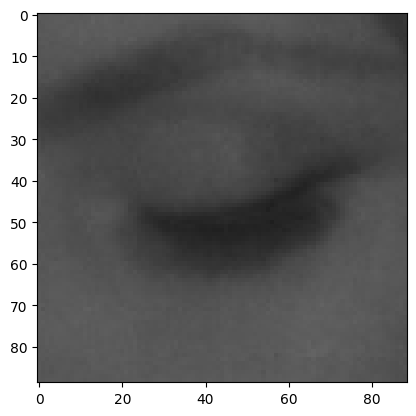

In [ ]:
img_array = cv2.imread("/content/Close-Eyes/s0037_01021_1_0_0_0_1_01.png")
plt.imshow(img_array)

In [ ]:
img_array.shape

(89, 89, 3)

(67, 67, 3)


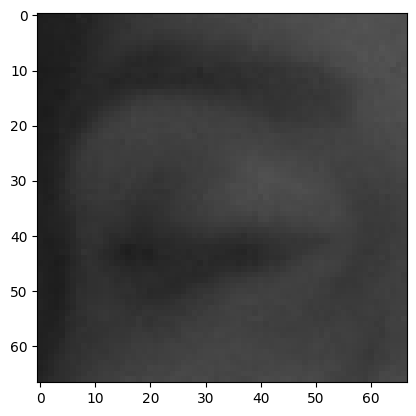

In [ ]:
Data_dir='/content/drive/MyDrive/Driver_Drowsiness/EYES/'
Classes=["Closed","Open"]
for category in Classes:
    path=os.path.join(Data_dir,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        print(img_array.shape)
        plt.show()
        break
    break

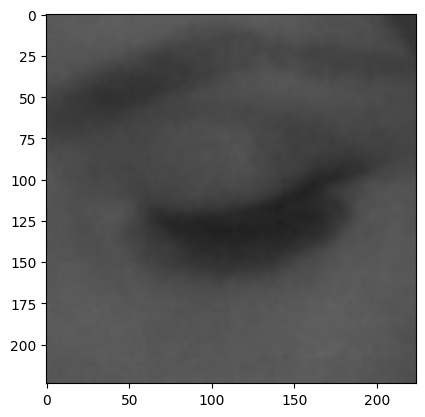

In [ ]:
img_size=224

img_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(img_array)

In [ ]:
# import os
# import cv2
# import numpy as np
# from tensorflow.keras.applications import VGG16
# from tensorflow.keras.applications.vgg16 import preprocess_input

# def feature_extraction_generator(data_dir, classes, batch_size=32):
#     model = VGG16(weights='imagenet', include_top=False)
#     num_classes = len(classes)
#     while True:
#         for i in range(0, num_classes, batch_size):
#             batch_images = []
#             labels = []
#             for j in range(i, min(i + batch_size, num_classes)):
#                 class_dir = os.path.join(data_dir, classes[j])
#                 for image_file in os.listdir(class_dir):
#                     image_path = os.path.join(class_dir, image_file)
#                     image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#                     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#                     image = cv2.resize(image, (224, 224))
#                     image = image / 255.0
#                     batch_images.append(image)
#                     labels.append(j)  # Assuming label corresponds to class index
#             yield np.array(batch_images), np.array(labels)

# # Example usage:
# data_directory = "/content/"
# class_names = ['Close-Eyes']
# generator = feature_extraction_generator(data_directory, class_names)
# batch_images, batch_labels = next(generator)
# print("Batch images shape:", batch_images.shape)
# print("Batch labels shape:", batch_labels.shape)


In [16]:
import os
import cv2
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

def feature_extraction_generator(data_dir, classes, batch_size=32):
    model = VGG16(weights='imagenet', include_top=False)
    num_classes = len(classes)
    image_paths = []
    labels = []
    for i, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        for image_file in os.listdir(class_dir):
            image_paths.append(os.path.join(class_dir, image_file))
            labels.append(i)  # Assuming label corresponds to class index

    num_samples = len(image_paths)
    while True:
        indices = np.random.choice(num_samples, batch_size)
        batch_images = []
        batch_labels = []
        for idx in indices:
            image_path = image_paths[idx]
            image = cv2.imread(image_path, cv2.IMREAD_COLOR)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            image = preprocess_input(image)
            batch_images.append(image)
            batch_labels.append(labels[idx])
        yield np.array(batch_images), np.array(batch_labels)



In [29]:
data_directory = "/content/"
class_names = ['Close-Eyes','Open-Eyes']
generator = feature_extraction_generator(data_directory, class_names)

# total_samples = 0
# for _ in generator:
#     total_samples += 32  # Assuming batch_size is defined
#     # You can also print or perform other operations with each batch if needed

# print("Total number of samples:", total_samples)

In [30]:
x= next(generator)
x[0]

array([[[[-4.1939003e+01, -5.4778999e+01, -6.1680000e+01],
         [-4.1939003e+01, -5.4778999e+01, -6.1680000e+01],
         [-4.1939003e+01, -5.4778999e+01, -6.1680000e+01],
         ...,
         [-1.2939003e+01, -2.5778999e+01, -3.2680000e+01],
         [-1.1939003e+01, -2.4778999e+01, -3.1680000e+01],
         [-1.0939003e+01, -2.3778999e+01, -3.0680000e+01]],

        [[-4.1939003e+01, -5.4778999e+01, -6.1680000e+01],
         [-4.1939003e+01, -5.4778999e+01, -6.1680000e+01],
         [-4.0939003e+01, -5.3778999e+01, -6.0680000e+01],
         ...,
         [-1.2939003e+01, -2.5778999e+01, -3.2680000e+01],
         [-1.1939003e+01, -2.4778999e+01, -3.1680000e+01],
         [-1.0939003e+01, -2.3778999e+01, -3.0680000e+01]],

        [[-4.1939003e+01, -5.4778999e+01, -6.1680000e+01],
         [-4.1939003e+01, -5.4778999e+01, -6.1680000e+01],
         [-4.0939003e+01, -5.3778999e+01, -6.0680000e+01],
         ...,
         [-1.2939003e+01, -2.5778999e+01, -3.2680000e+01],
         [

In [ ]:
import random

random.shuffle(training_data)

In [ ]:
training_data[0]

[array([[[143, 143, 143],
         [143, 143, 143],
         [142, 142, 142],
         ...,
         [117, 117, 117],
         [118, 118, 118],
         [119, 119, 119]],
 
        [[143, 143, 143],
         [142, 142, 142],
         [142, 142, 142],
         ...,
         [117, 117, 117],
         [118, 118, 118],
         [119, 119, 119]],
 
        [[143, 143, 143],
         [142, 142, 142],
         [141, 141, 141],
         ...,
         [117, 117, 117],
         [118, 118, 118],
         [119, 119, 119]],
 
        ...,
 
        [[238, 238, 238],
         [238, 238, 238],
         [238, 238, 238],
         ...,
         [236, 236, 236],
         [237, 237, 237],
         [237, 237, 237]],
 
        [[238, 238, 238],
         [238, 238, 238],
         [238, 238, 238],
         ...,
         [236, 236, 236],
         [237, 237, 237],
         [237, 237, 237]],
 
        [[238, 238, 238],
         [238, 238, 238],
         [238, 238, 238],
         ...,
         [236, 236, 236],
  

In [ ]:
x,y=[],[]

for features,label in training_data:
    x.append(features)
    y.append(label)

x=np.array(x).reshape(-1,img_size,img_size,3)
y=np.array(y)
x=x/255.0

In [ ]:
x[0]

array([[[0.56078431, 0.56078431, 0.56078431],
        [0.56078431, 0.56078431, 0.56078431],
        [0.55686275, 0.55686275, 0.55686275],
        ...,
        [0.45882353, 0.45882353, 0.45882353],
        [0.4627451 , 0.4627451 , 0.4627451 ],
        [0.46666667, 0.46666667, 0.46666667]],

       [[0.56078431, 0.56078431, 0.56078431],
        [0.55686275, 0.55686275, 0.55686275],
        [0.55686275, 0.55686275, 0.55686275],
        ...,
        [0.45882353, 0.45882353, 0.45882353],
        [0.4627451 , 0.4627451 , 0.4627451 ],
        [0.46666667, 0.46666667, 0.46666667]],

       [[0.56078431, 0.56078431, 0.56078431],
        [0.55686275, 0.55686275, 0.55686275],
        [0.55294118, 0.55294118, 0.55294118],
        ...,
        [0.45882353, 0.45882353, 0.45882353],
        [0.4627451 , 0.4627451 , 0.4627451 ],
        [0.46666667, 0.46666667, 0.46666667]],

       ...,

       [[0.93333333, 0.93333333, 0.93333333],
        [0.93333333, 0.93333333, 0.93333333],
        [0.93333333, 0

In [ ]:
# import pickle

# out=open('x.pickle','wb')
# pickle.dump(x,out)
# out.close()

# out=open('y.pickle','wb')
# pickle.dump(y,out)
# out.close

In [ ]:
# Creating our own CNN

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

In [ ]:
model=models.Sequential()

In [ ]:
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 64)      18496     
                                                                 
 flatten (Flatten)           (None, 3041536)           0         
                                                                 
 dense (Dense)               (None, 128)               389316736 
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 389345634 (1.45 GB)
Trainable params: 3893

In [ ]:
# import pickle

# out=open('CNN_model.pkl','wb')
# pickle.dump(model,out)
# out.close()

In [ ]:
base_input=model.layers[0].input

In [ ]:
base_output=model.layers[-1].output
final_output=layers.Dense(1, activation='sigmoid')(base_output)

In [ ]:
new_model=keras.Model(inputs=base_input,outputs=final_output)
new_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 64)      18496     
                                                                 
 flatten (Flatten)           (None, 3041536)           0         
                                                                 
 dense (Dense)               (None, 128)               389316736 
                                                                 
 dense_1 (Dense)             (None, 2)                 258   

In [ ]:
new_model.save("CNN_Model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
new_model.fit(x,y,epochs=1, batch_size=32)

In [ ]:
from tensorflow.keras.applications import VGG16

# Load the VGG16 model
vgg16_model = VGG16(weights='imagenet', include_top=True)


553467096/553467096 [==============================] - 24s 0us/step


In [ ]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
base_input=vgg16_model.layers[0].input

In [ ]:
base_output=model.layers[-1].output
final_output=layers.Dense(1, activation='sigmoid')(base_output)